# COST Tutorial: Axion Helioscopes

In this tutorial we will explore the **interplay between theory and experimental design** in the search for axions using helioscopes.  Our goal is to understand how predictions from axion models translate into an expected solar axion flux, how helioscopes like CAST and IAXO would detect them, and how design choices (magnet strength, length, aperture, exposure time) affect sensitivity.

The axion is a hypothetical pseudoscalar particle originally proposed as a solution to the **strong CP problem** in quantum chromodynamics (QCD). Beyond this theoretical motivation, axions and axion-like particles (ALPs) are also compelling **dark matter candidates** and have wide-ranging implications in astrophysics and cosmology.

The central idea of a helioscope is simple but powerful:

1. **Axion production in the Sun**  
   The hot and dense plasma in the solar core provides an environment where axions can be efficiently produced through interactions of photons, electrons, and nucleons.

2. **Propagation to Earth**  
   Once created, axions leave the Sun essentially unimpeded and travel to Earth. Unlike photons, which are absorbed or scattered, axions carry important information about their production mechanism.

3. **Conversion in a laboratory magnet**  
   When axions encounter a strong transverse magnetic field (such as in the CAST or IAXO experiments), they can convert back into photons through the **inverse Primakoff effect**. These regenerated X-rays can then be detected with sensitive X-ray detectors.

Because the expected signal rate is very low, the design of the helioscope is crucial. Parameters such as the **magnetic field strength**, **magnet length**, **aperture size**, and **exposure time** directly affect the sensitivity.  
Moreover, coherence effects between axions and photons mean that sensitivity also depends on the **axion mass**. Larger axion masses can be scanned with the help of a **buffer gas**.

By the end of this tutorial you should be able to:

- see how the expected axion flux from the Sun differs for different production mechanisms, 
- calculate the conversion probability inside a helioscope,  
- explore how experimental parameters shape the expected photon signal,  
- and appreciate how theoretical models (KSVZ, DFSZ, generic ALPs) guide the design of next-generation experiments like IAXO.

---

## Introduction
Axions (and more generally axion-like particles, ALPs) are hypothetical pseudoscalar particles originally proposed to solve the strong CP problem in QCD.  
They are also compelling dark matter candidates, and their weak couplings to photons and matter allow them to be searched for in a variety of laboratory and astrophysical settings.

**Helioscopes** are one of the most sensitive instruments for probing axion–photon couplings.  
They exploit the fact that the Sun would be a copious source of axions, and that these axions can be converted back into photons in a strong magnetic field on Earth.

![CAST schematic](CAST_schematic.png)

---

The tutorial is coded in Python so that you also have the notebook interface for explanations. We start by importing libraries that we will need later.

In [21]:
# Libraries we will need
import numpy as np
import matplotlib.pyplot as plt

We also define some plotting parameters to have plots in Latex style.

In [22]:
# Activate LaTeX rendering and set font family
plt.rcParams.update({
    "text.usetex": True,        # use LaTeX for all text
    "font.family": "serif",     # use serif fonts (Computer Modern by default)
    "axes.labelsize": 16,
    "font.size": 16             # adjust font size
})

We kept the coding part of this tutorial very light, the main difficulty will be to keep track of the correct units! Here we list some of the relevant conversion factors.

In [24]:
#--------------------------------
# Conversions
#--------------------------------
cm_to_m = 1e-2                       # cm to m
s_to_year = 365*24*60*60             # s to year
hbarc = 1.973e-7                   # eV*m
m_to_eV_inv = 1.0/hbarc            # m to eV^-1 (=5.067730e6)
T_to_eV2 = 195.35277110228742      # Tesla to eV^2 (1 T -> ~195.35 eV^2)

## Part I. Quick reminder on axion theory
### Relevant interactions
For axion helioscopes, the relevant interactions are axion-photon, axion-electron and axion-nucleon interactions. Generically, the effective Lagrangian contains dim-5 interaction terms of the form:

  $$
  \mathcal{L} \supset -\frac{1}{4} g_{a\gamma} \, a \, F_{\mu\nu} \tilde F^{\mu\nu}
  \;+\; i g_{ae} a \bar e \gamma_5 e \;+\; g_{aN} a \bar N \gamma_5 N \, .
  $$

The exact way the Peccei–Quinn (PQ) mechanism is implemented defines different **axion models**. What matters is how Standard Model particles are assigned PQ charges, since these determine the couplings to photons and gluons. The first simple attempt (the PQWW model) tied the PQ scale to the electroweak scale and was quickly ruled out. To avoid this, “invisible axion” models were proposed, leading to two benchmark classes that we still use today: KSVZ and DFSZ.


Hence, the strengths of the interactions to photons, electrons etc. depend on the UV completion of the axion model.
  - **KSVZ axion** ("hadronic axion"): couples mainly to photons, negligible electron coupling.  
  - **DFSZ axion** ("non-hadronic axion", type I and II): couples to electrons at tree-level and to photons via fermion loops.  
  - More general ALPs can have arbitrary couplings to photons, electrons, and nucleons.

Thus, the **predicted solar flux** depends on which couplings are present and how strong they are. For instance, it is instructive to factor out the dependence of the couplings on the PQ symmetry breaking scale, $f_a$, and to define a dimensionless coupling $C_{a\gamma}$ via

$$
g_{a\gamma} = \frac{\alpha}{2\pi}\frac{C_{a\gamma}}{f_a} \;.
$$

The coupling to photons can then be expressed as

$$
C_{a\gamma} \simeq E/N−2(4m_d +m_u)/3(m_u +m_d) \simeq E/N−1.92
$$

with $E$ the colour anomaly coefficient and $N$ the electromagnetic anomaly. The first term hence depends on the specific implementation of the PQ mechanism. 

---

### Axion photon coupling
Recall that the effective dimension-5 ALP-photon interaction term in the Lagrangian reads $\mathcal{L}^{(5)}_{a\gamma} = -\frac{g_{a\gamma}}{4} a F_{\mu\nu}\tilde{F}^{\mu\nu}=g_{a \gamma} \mathbf{E} \cdot \mathbf{B}\ a $ where $\tilde{F}^{\mu\nu}=\frac{1}{2}\epsilon^{\mu\nu\alpha\beta}F_{\alpha\beta}$. Via this coupling, axions can convert back into photons in a strong transverse magnetic field via the inverse Primakoff effect. The inverse Primakoff process lies at the heart of the axion helioscope principle. Let us therefore first derive the explicit form of this coupling in terms of the magnetic field, $\mathbf{B}$:

<span style="color:blue">**1. Exercise**</span>: The effective dimension-5 ALP-photon interaction term in the Lagrangian reads $\mathcal{L}^{(5)}_{a\gamma} = -\frac{g_{a\gamma}}{4} a F_{\mu\nu}\tilde{F}^{\mu\nu}$ where $\tilde{F}^{\mu\nu}=\frac{1}{2}\epsilon^{\mu\nu\alpha\beta}F_{\alpha\beta}$. Recall that the electromagnetic field strength tensor reads:

$$
F^{\mu\nu} = \left(\begin{array}{cccc}
0 & -E^1 & -E^2 & -E^3 \\
E^1 & 0 & -B^3 & B^2 \\
E^2 & B^3 & 0& -B^1 \\
E^3 & -B^2 & B^1 & 0 \\
\end{array}\right)
$$

Derive the form of the coupling in terms of $\mathbf{E}$ and $\mathbf{B}$ and show that it is CP-conserving.

## Part II. Inside the Sun

If axions exist then the Sun is an efficient factory for them because of its high temperature and density. The most important processes are:

- **Primakoff process**: $\gamma+Q \rightarrow Q+a$. Photons scatter off charged particles in the solar plasma, (electrons, nuclei) and convert into axions.
- **ABC processes** (for non-vanishing electron or nucleon couplings): bremsstrahlung, Compton scattering, nuclear transitions.
    - Compton scattering: $\gamma+e \rightarrow e+a$
    - Electron-nucleus bremsstrahlung: $e+I \rightarrow e+I+a$
    - Electron-electron bremsstrahlung: $e+e \rightarrow e+e+a$
    - Axio-recombination: $e+I \rightarrow I^{-}+a$
    - Axio-deexcitation: $I^* \rightarrow I+a$

For hadronic models only the Primakoff process is relevant. 

<img src="production_sun.png" alt="Production in the Sun" width="20%">

For non-hadronic models the dominant emission processes are electron-nucleus bremsstrahlung, electron-electron bremsstrahlung, and the Compton process. Importantly, the differential axion flux coming from the sun is peaked at different energies, depending on the production mechanism. This will have important consequences for the design of axion helioscopes, as we will study below.



Since axions are coupled very weakly and have a small mass, once produced, they stream out freely of the hot core. The differential flux at Earth is calculated by folding the production rate with the solar model (temperature and density profiles), then propagating the axions out to Earth. The theoretical differential axion flux (number of axions per unit energy, area, and time) expected on Earth is

  $$
  \frac{d\Phi_a}{dE_a} =\frac{1}{4 \pi d_{\odot}^2} \int_0^{R_\odot} d^3 r \;
  \frac{E_a^2}{e^{E_a/T(r)} - 1} \, \Gamma(E_a, T(r), n_e(r)) \, .
  $$
  
where $ d_{\odot} \approx 1.50 \times 10^{13} \mathrm{~cm}$ is the average Earth-Sun distance, $R_{\odot}$ the sun's radius and we integrate over the sun's volume ($d^3 \boldsymbol{r}$). $E_a$ is the axion's energy, and $\Gamma$ the conversion rate into axions. $E_a^2/(\exp(E_a / T)-1)/\pi^2$ is the blackbody photon occupation number per unit volume and energy. This comes from Bose–Einstein statistics for photons at temperature $T(r)$ and a phase space factor ($ \frac{dp^3}{(2\pi)^3}=\frac{4\pi p^2 dp}{(2\pi)^3}$ and $E=p$ and including a factor 2 for the two polarizations). Here one assumes $E_a\approx E_\gamma$ (which is ok because the axions are very light). Standard solar models provide $T(r)$, $\rho(r)$, $n_e(r)$ (electron density), $Z(r)$ (ion composition, i.e. fractions of H, He, metals) and $\kappa (r)$ (opacity) which also partly enter the conversion rate $\Gamma$. 

To appreciate the different phenomenological features of different axion models, we plot below the axion fluxes coming from various production processes, for which accurate fit functions exist (so that we do not have to bother integrating the data from solar models).

---

### Primakoff process
Inside the Sun, photons can turn into axions through the Primakoff effect, where the electromagnetic fields of charged particles act as the “catalyst” for the conversion. The axions that are produced carry roughly the same energies as photons in the solar core, which means they are typically around $\sim 3$ keV. Since this is much larger than the expected axion mass, they are highly relativistic, and the total flux depends very little on $m_a$ (at least for the QCD axion). A very accurate analytic formula exists for the differential Primakoff flux at Earth, valid in the $1–11$ keV range [arxiv:1302.6283] (see also [arxiv:0702006]). We will plot the differential axion flux below, using this formula. As you can see, the spectrum peaks near 3 keV and then drops quickly at higher energies.

<img src="primakoff.png" alt="Primakoff" width="30%">


In [25]:
def primakoff_flux(Ea, g_agamma):
    """Flux from Primakoff process in the sun, using a fit model from [arxiv:1302.6283]. Expects Ea in units of keV and g_agamma in units of GeV^-1 and returns flux in units of [m^-2 years^-1 keV^-1]"""
    flux_P = 2.0e18 * (g_agamma/1e-12)**2 *Ea**2.450 * np.exp(-0.829 * Ea)# * cm_to_m**2 * s_to_year  # [cm^-2 s^-1 keV^-1]
    return flux_P

### ABC processes
The same reference [arxiv:1302.6283] provides also fit formulae for the fluxes from Compton and Bremsstrahlung processes (the Bremsstrahlung flux includes both electron-nucleus - only H and He - and electron-electron contributions). Importantly, the flux from these processes is much larger in amplitude (assuming the same coupling strength) and peaked at smaller energies, around $\sim 1$ keV.

Note that Axio-recombination and Axio-deexcitation processes are also relevant, but bound-bound transisitions lead to spikes in the differential flux, making it impossible to provide a fit formula. We hence neglect these processes in this tutorial.

<img src="eebremsstrahlung.png" alt="Bremsstrahlung ee" width="30%"> <img src="eIbremsstrahlung.png" alt="Bremsstrahlung" width="30%"> <img src="Compton.png" alt="Compton" width="30%">




### Nuclear processes

In the lectures you have also heard about nuclear processes. Nuclear couplings are important, as they will necessarily arise in the low-energy effective theory.  These
emissions are mono-energetic and are associated with particular nuclear reactions in the
solar core.  They lead to very specific signals but we will not study them in this tutorial. 

<span style="color:blue">**2. Exercise**</span>: Plot the axion flux at Earth for the different processes, assuming $g_{a\gamma}=10^{-12}$ GeV$^{-1}$ and $g_{ae}=10^{-13}$ GeV$^{-1}$ as a function of the axion energy $E_a$. Compute the total flux integrated over energy. What is the ratio of integrated total flux for the Primakoff vs. ABC Processes (in terms of $(C_{ae}/C_{a\gamma})^2$)? Compute the axion luminosity and number of photons that arrive on Earth per second, again for $g_{a\gamma}=10^{-12}$ GeV$^{-1}$ and $g_{ae}=10^{-13}$ GeV$^{-1}$.

In [26]:
def compton_flux(Ea, g_ae ):
    """Flux from Compton process in the sun, using a fit model from [arxiv:1302.6283]. Expects Ea in units of keV and g_ae in units of GeV^-1 and returns flux in units of [m^-2 years^-1 keV^-1]"""
    flux_C = 4.2e18 * (g_ae/1e-13)**2 * Ea**2.987 * np.exp(-0.776*Ea)
    return flux_C

def bremsstrahlung_flux(Ea, g_ae ):
    """Flux from Bremsstrahlung process in the sun, using a fit model from [arxiv:1302.6283]. Expects Ea in units of keV and g_ae in units of GeV^-1 and returns flux in units of [m^-2 years^-1 keV^-1]"""
    flux_B = 8.3e20 * (g_ae/1e-13)**2 *Ea / (1.0 + 0.667 * Ea**1.2789) * np.exp(-0.77 * Ea)
    return flux_B

def ABC_flux(Ea,gae):
    flux_tot = bremsstrahlung_flux(Ea, g_ae )+compton_flux(Ea, g_ae )
    return flux_tot
    

We use as benchmark couplings $g_{a\gamma}=10^{-12}$ GeV$^{-1}$ and $g_{ae}=10^{-13}$. Now we can plot the fluxes as a function of energy.

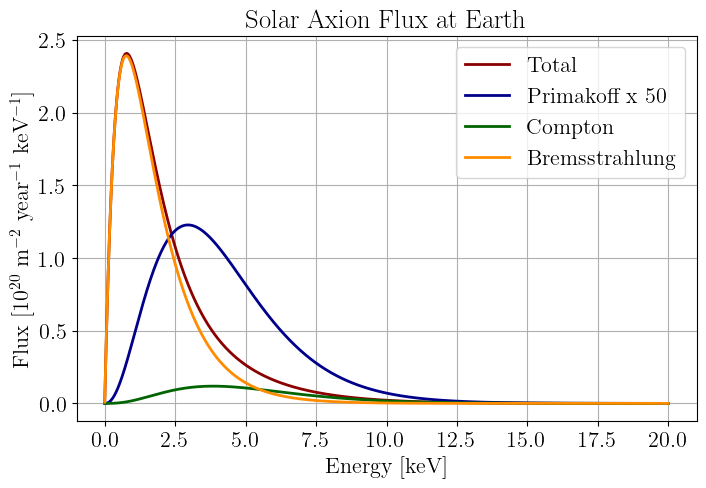

In [27]:
# ===============================
# Solar Axion Flux
# ===============================

# -------------------------------
# couplings
# -------------------------------
g_agamma = 1e-12  # GeV^-1
g_ae = 1e-13 # GeV^-1

# number of discretisation points in energy
Ne = 2000

# Energy array [keV]
E_array = np.linspace(0.001, 20, Ne) # keV

# -------------------------------
# Compute fluxes
# -------------------------------
flux_P = primakoff_flux(E_array, g_agamma)  # [m^-2 years^-1 keV^-1]
flux_C = compton_flux(E_array, g_ae)  # [m^-2 years^-1 keV^-1]
flux_B = bremsstrahlung_flux(E_array, g_ae)  # [m^-2 years^-1 keV^-1]

# -------------------------------
# Plot them
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(E_array, (flux_P+flux_C+flux_B)*1e-20, lw=2, label='Total',color="darkred")
plt.plot(E_array, flux_P*50*1e-20, lw=2, label='Primakoff x 50',color="darkblue")
plt.plot(E_array, flux_C*1e-20, lw=2, label='Compton',color="darkgreen")
plt.plot(E_array, flux_B*1e-20, lw=2, label='Bremsstrahlung',color="darkorange")
plt.xlabel('Energy [keV]',fontweight="bold")
plt.ylabel('Flux [$10^{20}$ m$^{-2}$ year$^{-1}$ keV$^{-1}$]',fontweight="bold")
plt.title('Solar Axion Flux at Earth',fontweight="bold")
plt.grid(True)
plt.legend()
#plt.savefig("fluxes.pdf")
plt.show()



Let us also integrate the differential flux over energy and compare the relative size in terms of the dimensionless couplings $C_{a\gamma}= \frac{2\pi}{\alpha}g_{a\gamma}f_a$ and $C_{ae}=\frac{g_{ae}f_a}{m_e}$.

In [28]:
# -------------------------------
# Integrated flux
# -------------------------------
def integrate_flux(E, flux):
    return np.trapezoid(flux, E)

P_tot = integrate_flux(E_array, flux_P*1e-20)
C_tot = integrate_flux(E_array, flux_C*1e-20)
B_tot = integrate_flux(E_array, flux_B*1e-20)


from scipy.special import gamma
me = 0.5*1e-3 # electron mass in eV
alpha_inv = 137 # inverse of fine structure constant
print("Total Primakoff flux in [$10^{20}$ m$^{-2}$ year$^{-1}$], numerical:", P_tot)
print("Total Primakoff flux in [$10^{20}$ m$^{-2}$ year$^{-1}$], analytical:",1.9098* (g_agamma/1e-12)**2*gamma(3.45)*1e-20*2.0e18)


print("Ratio (Bremsstrahlung+Compton)/Primakoff flux in terms of C_ae^2/C_agamma^2:", (C_tot+B_tot)/(g_ae/me)**2/(P_tot/(g_agamma*alpha_inv*2*np.pi)**2) )




Total Primakoff flux in [$10^{20}$ m$^{-2}$ year$^{-1}$], numerical: 0.12017353514697562
Total Primakoff flux in [$10^{20}$ m$^{-2}$ year$^{-1}$], analytical: 0.12017653519216233
Ratio (Bremsstrahlung+Compton)/Primakoff flux in terms of C_ae^2/C_agamma^2: 961.3131178170242


The flux of ABC processes is almost 1000 times bigger in terms of dimensionless couplings!

## Part III. Inside a helioscope

As already mentioned, the basic principle of the helioscope makes use of the axion-photon coupling, $\mathcal{L}_{a\gamma} = -g_{a\gamma}/4 a F_{\mu\nu}\tilde{F}^{\mu\nu}=g_{a \gamma} \mathbf{E} \cdot \mathbf{B} a $, generically present in any axion model. Due to this coupling, once axions reach Earth, they can be converted (back) into photons in a strong transverse magnetic field via the inverse Primakoff effect. The axion–photon conversion probability follows from solving the linearised modified Maxwell equations (with the axion–photon interaction term added to the Lagrangian), which yields photon–axion oscillations analogous to neutrino mixing in an external magnetic field:

$$
P_{a \rightarrow \gamma}=\left(\frac{g_{a \gamma} B L}{2}\right)^2 \mathcal{F}(qL)\; ,
$$

and the form factor $\mathcal{F}$ accounts for the coherence of the process:

$$
  \mathcal{F}(qL)=\operatorname{sinc}^2\left(\frac{q L}{2}\right)=\frac{2(1-\cos q L)}{(q L)^2}  
$$



- Here $B$ is the field strength, $L$ the length of the magnet, and  
  $F(qL)$ encodes the loss of coherence when the axion mass $m_a$ is non-negligible.  
- For very light axions, coherence is maintained ($F\approx 1$).  
- **Buffer gas**: filling the magnet bore with a low-density gas gives photons an effective mass, allowing the experiment to “tune” coherence back and scan for higher $m_a$.

---

<span style="color:blue">**3. Exercise**</span>: Assuming $m_a\ll E_a$ and $m_\gamma \ll E_\gamma$, derive the expression for the momentum transfer, $q=\left|p_a-p_\gamma\right|=\left|\frac{m_a^2-m_\gamma^2}{2 E_a}\right|$. What is the condition on $qL$ so that coherence is maintained?

### Exploring the conversion probability in CAST-like setups

As an explicit example we choose the parameters from **CAST**: 
- $B\sim 10$ $T$
- $L\sim 10$ $m $
- $A=14.52$ $cm^2$

We also assume a detector efficiency of $\epsilon=1$ and we assume that we take data for $\Delta t$=90 min.

<span style="color:blue">**4. Exercise**</span>: Explore numerically how decoherence sets in for increasing $m_a$ (plot $P_{a \rightarrow \gamma}$ as a function of $m_a$ for the above parameters from CAST). Assume that the axion's energy is $\langle E_a \rangle = 4$ keV (which is approximately the average energy for the flux coming from the Primakoff process). For which axion masses will coherence be lost? Assume you have a longer magnet. What is the effect of having a longer magnet on the conversion probability? What is the effect of choosing a different average axion energy, say $\langle E_a \rangle = 1 $ keV? 

In [29]:
# -------------------------------
# Parameters
# -------------------------------
g_agamma = 1e-10 #GeV^-1
B_default = 9.0 # Tesla
L_default = 10.0 # m
A_default = 14.52 # cm2
T_default = 1.8 # K
efficiency = 1.0 # assume 100% detector efficiency for simplicity

In [30]:
# -------------------------------
# Conversion probability function
# -------------------------------
# main conversion prob function (all energies in eV, lengths in m, B in T, masses in eV)
def conversion_probability(E_eV, B_T, L_m, g_GeVinv, m_a_eV, m_gamma_eV=0.0):
    """
    E_eV: scalar or numpy array of axion/photon energy in eV
    B_T: Tesla
    L_m: length in meters
    g_GeVinv: coupling in GeV^-1
    m_a_eV, m_gamma_eV: masses in eV
    returns: P (same shape as E_eV)
    """
    # convert units
    g_eVinv = g_GeVinv* 1.0e-9          # eV^-1
    B_eV2 = B_T * T_to_eV2              # eV^2
    L_eVinv = L_m * m_to_eV_inv          # eV^-1

    # momentum transfer q = (m_a^2 - m_gamma^2) / (2E)  (E in eV, masses in eV -> q in eV)
    q = (m_a_eV**2 - m_gamma_eV**2) / (2.0 * E_eV)
    x = q * L_eVinv   # dimensionless
    F = form_factor_from_x(np.asarray(x))

    pref = 0.5 * g_eVinv * B_eV2 * L_eVinv   # dimensionless
    P = (pref**2) * F
    return P

def form_factor_from_x(x):
    # x = q * L (dimensionless when q in eV and L in eV^-1)
    small = np.abs(x) < 1e-12
    F = np.empty_like(x, dtype=float)
    # safe sine-based sinc
    F[~small] = (np.sin(x[~small]/2.0) / (x[~small]/2.0))**2
    F[small] = 1.0
    return F

We plot the conversion probability for the two average energies as a function of th axion's mass. We vary both the average energy and the length of the magnet.

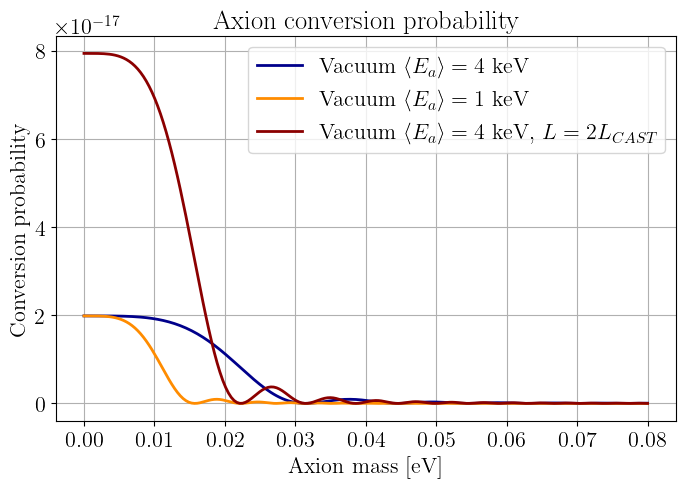

In [31]:
# -------------------------------
# Explore vs axion mass
# -------------------------------
E_av = 4.0e3    # eV
E_av_ABC = 1.0e3    # eV

m_a_array = np.linspace(1e-15, 0.08, 200)  # eV
P_array = conversion_probability(E_av, B_default, L_default, g_agamma, m_a_array, 0.0)
P_array_ABC = conversion_probability(E_av_ABC, B_default, L_default, g_agamma, m_a_array, 0.0)
P_array_L = conversion_probability(E_av, B_default, L_default*2, g_agamma, m_a_array, 0.0)


plt.figure(figsize=(8,5))
plt.plot(m_a_array, P_array,color="darkblue",label='Vacuum $\\langle E_a \\rangle = 4$ keV', lw=2)
plt.plot(m_a_array, P_array_ABC, label='Vacuum $\\langle E_a \\rangle = 1$ keV', lw=2,color="darkorange")
plt.plot(m_a_array, P_array_L, label='Vacuum $\\langle E_a \\rangle = 4$ keV, $L=2L_{CAST}$', lw=2,color="darkred")

plt.xlabel('Axion mass [eV]')
plt.ylabel('Conversion probability')
plt.title('Axion conversion probability')
plt.legend()
plt.grid(True)
plt.show()

The key quantity controlling coherence is

$$
q=\frac{m_a^2-m_\gamma^2}{2 E}
$$

- $m_a$ : axion mass
- $m_\gamma$ : effective photon mass in the medium (zero in vacuum, nonzero with buffer gas)
- $E$ : axion energy

And the coherence condition is $q L \lesssim 1$.

- If their momenta are slightly mismatched, the axion wave and photon wave gradually slip relative to each other.
As long as the phase slip is small over the length of the magnet, they interfere constructively → conversion probability grows like $L^2$.
Once the phase slip accumulates to about one full oscillation ($qL\sim \pi$), the interference becomes destructive and the conversion averages out.

Notice that $q \propto 1 / E$.
- Higher energy $\rightarrow$ smaller $q \rightarrow$ slower phase slip between axion and photon $\rightarrow$ coherence holds for larger masses or longer magnets.
- Lower energy $\rightarrow$ larger $q \rightarrow$ phase slip accumulates faster $\rightarrow$ coherence is lost more easily.

So at fixed magnet length and axion mass, higher-energy axions are easier to convert coherently.

- Longer magnets are more powerful when coherence holds, since $P_{a\rightarrow \gamma}\sim (gBL)^2$

- But they are also more sensitive to phase mismatch, because the condition $qL<1$ is harder to satisfy.

### Restoring coherence: Adding a buffer gas

To mitigate the loss of coherence between axions and photons inside the magnet, a buffer gas can be introduced into the beam pipes. The electrons in the gas provide an effective photon mass through the plasma frequency,
$$
m_\gamma^2 = \hbar^2 \omega_p^2\;, \qquad \omega_p^2 = \frac{4\pi\alpha n_e}{m_e} \;,
$$
where $n_e$ is the electron density. When this matches the axion mass ($m_a\simeq m_\gamma$) the momentum transfer $q$ vanishes and coherence is restored. By gradually increasing the pressure of the gas, the photon mass can be tuned, and the sensitivity of the helioscope can be systematically extended to higher axion masses.

For helium gas, and assuming ideal-gas behaviour, the effective photon mass can be estimated as

$$
m_\gamma^2\simeq 8\pi \frac{e^2 N_A}{m R} \frac{p}{T} = \sqrt{0.02 \frac{p/mbar}{T/K}} eV
$$
with $m$ the mass of electrons, $R$ the gas constant and $N_A$ Avogadro's constant. This simple expression (obtained by noting that helium contributes two electrons per atom) provides a useful back-of-the-envelope scaling. In practice, more accurate determinations of $m_\gamma$  are obtained from detailed simulations of the gas behaviour in the magnet bores, but for our tutorial we will use the analytic estimate above.

<img src="schematic_buffer_gas.pdf" alt="Buffer gas in CAST" width="50%">

<span style="color:blue">**5. Exercise**</span>: Assume you add Helium 4 as a buffer gas at $p=5.49$ mbar and $T=1.8$ K. What is approximately the mass of the photon? How does it modify coherence for larger axion masses?

We start by defining a function for the photon mass, using the approximate formula from above. Then we compare the conversion probability for a model with $g_{a\gamma}=10^{-10}$ GeV$^{-1}$ for both vacuum and a configuration with a buffer gas.

In [32]:
t_default = 90 * 60 # [s]  (90 min)
p_default = 5.49 # mbar

# -------------------------------
# Effective photon mass in Helium
# -------------------------------
def mgamma_eff(p,T):
    """Simplified expression for the effective photon mass in Helium, assuming an ideal gas."""
    # p in mbar
    # T in K
    m_eff = np.sqrt(0.02*p/T) # in eV
    return m_eff

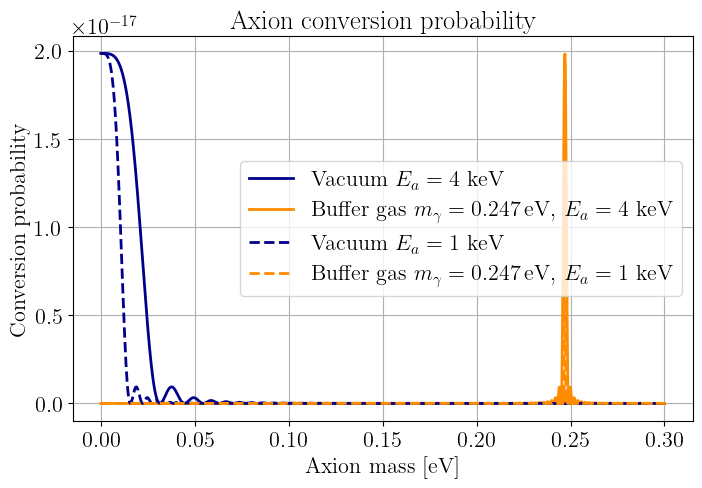

In [33]:
# -------------------------------
# Explore vs axion mass
# -------------------------------
E_av = 4.0e3    # eV
E_av_ABC = 1.0e3    # eV

m_a_array = np.linspace(1e-15, 0.3, 2000)  # eV
P_array = conversion_probability(E_av, B_default, L_default, g_agamma, m_a_array, 0.0)
P_array_ABC = conversion_probability(E_av_ABC, B_default, L_default, g_agamma, m_a_array, 0.0)

# -------------------------------
# buffer gas effect
m_gamma_buffer = mgamma_eff(p_default,T_default) #eV
P_buffer = conversion_probability(E_av, B_default, L_default, g_agamma, m_a_array, m_gamma_buffer)
P_buffer_ABC = conversion_probability(E_av_ABC, B_default, L_default, g_agamma, m_a_array, m_gamma_buffer)

plt.figure(figsize=(8,5))
plt.plot(m_a_array, P_array,color="darkblue",label='Vacuum $E_a = 4$ keV', lw=2)
plt.plot(m_a_array, P_buffer, color="darkorange", label=fr"Buffer gas $m_\gamma = {m_gamma_buffer:.3f}\,\mathrm{{eV}}$, $E_a = 4$ keV", lw=2)
plt.plot(m_a_array, P_array_ABC, label='Vacuum $ E_a = 1$ keV', lw=2,color="darkblue",linestyle='--')
plt.plot(m_a_array, P_buffer_ABC, label=fr"Buffer gas $m_\gamma = {m_gamma_buffer:.3f}\,\mathrm{{eV}}$, $E_a = 1$ keV", lw=2,color="darkorange",linestyle='--')
plt.xlabel('Axion mass [eV]')
plt.ylabel('Conversion probability')
plt.title('Axion conversion probability')
plt.legend()
plt.grid(True)
#plt.savefig("conversion_proba.pdf")
plt.show()

You should see two things:
1. When adding a buffer gas, coherence can be maintained only in  a narrow range of axion masses!
2. For higher axion mean energies, coherence can be maintained for larger axion masses.

### Expected number of photons inside the helioscope
The total number of expected photons can be obtained by convoluting the differential axion flux with the conversion probability into photons, the detection area perpendicular to the axion flux $A$ and the exposure time $t$ and integrating over the axion's energy.
$$
N_\gamma=\int_E \frac{d \Phi\left(E_a, g_{a \gamma \gamma}^2\right)}{d E_a} P_{a \rightarrow \gamma}\left(E_a, m_a, g_{a \gamma \gamma}^2\right) \ \epsilon\left(E_a\right) \ \Delta t \ A \ d E_a \;.
$$


<span style="color:blue">**5. Exercise**</span>: Imagine a KSVZ axion with $m_a=0.01$ keV and $g_{a\gamma}=10^{-12}$ GeV$^{-1}$ exists. What would be the expected number of photons in the CAST helioscope for half of the data taking period per day (90 min)? Can the number of photons be increased by using a buffer gas? For axion models with both an axion-electron and axion-photon coupling, how does the expression for the number of photons depend on $g_{ae}$ and $g_{a\gamma}$? Plot the number of photons as a function of the axion mass for both the vacuum case and adding the buffer gas from above, assuming again the parameters from CAST.

In [34]:
# -------------------------------
# Expected number of photons
# -------------------------------
def number_photons(B_T, L_m, A_cm2, t_s, g, m_a_eV, flux_keV, E_keV, m_gamma):
    P_array = conversion_probability(E_keV* 1e3, B_T, L_m, g, m_a_eV, m_gamma)
    dN = flux_keV* 1e-3 * P_array * A_cm2 * t_s
    return np.trapezoid(dN, E_keV* 1e3)

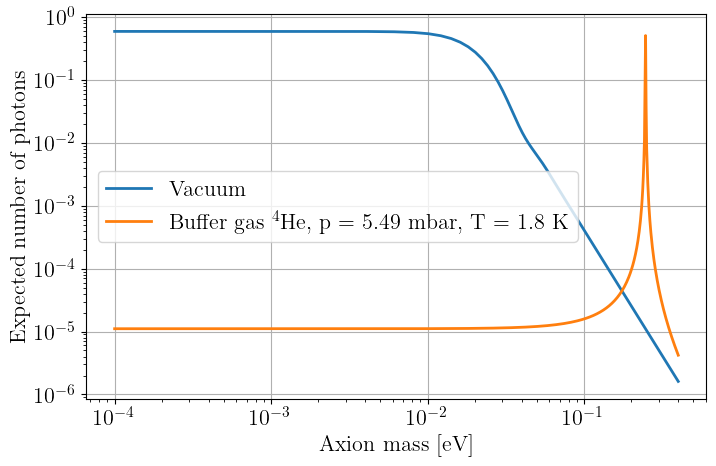

In [35]:
# -------------------------------
# Explore vs axion mass
# -------------------------------
# Flux
E_array = np.linspace(0.001, 20, 20000) #keV
flux_array = primakoff_flux(E_array, g_agamma)*cm_to_m**2/s_to_year  # [cm^-2 s^-1 keV^-1]# [cm^-2 s^-1 keV^-1]

N = 200
m_a_array = np.linspace(0.0001, 0.4, N)   # eV
Ngamma = np.zeros(N)
for i in range(N):
    Ngamma[i] = number_photons(B_default, L_default , A_default, t_default, g_agamma, m_a_array[i], flux_array, E_array, 0.0)

mg = mgamma_eff(p_default,T_default)
Ngamma_buffer = np.zeros(N)
for i in range(N):
    Ngamma_buffer[i] = number_photons(B_default, L_default , A_default, t_default, g_agamma, m_a_array[i], flux_array, E_array, mg)

plt.figure(figsize=(8,5))
plt.loglog(m_a_array, Ngamma, label='Vacuum', lw=2)
plt.loglog(m_a_array, Ngamma_buffer, label='Buffer gas $^4$He, p = 5.49 mbar, T = 1.8 K', lw=2)
plt.xlabel('Axion mass [eV]')
plt.ylabel('Expected number of photons')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

Hence, in going to higher masses one has to finely tune the buffer gas in small steps (each pressure step can probe a small axion mass interval). The red exclusion line is the bound from CAST for the vacuum case (as you can see, around $m_a\sim 10^{-2}$ eV one starts losing coherence), the red exclusion line comes from the runs with buffer gas, where each "spike" corresponds to a different pressure setting.

<img src="CAST_limit.png" alt="Limits from CAST" width="50%">

## Part IV. Turning knobs: designing your favourite helioscope

The sensitivity of a helioscope is usually expressed through a **figure of merit**, which can be defined as proportional to the signal to noise ratio (expected number of photons divided by the square root of the number of background photons) for a given value of $g$
$$
f = f_M\times f_O \times f_D\times f_T
$$
with 
$$
f_M  =B^2 L^2 A \;, \qquad f_O  =\frac{\epsilon_o}{\sqrt{a}}\;, \qquad f_D  =\frac{\epsilon_d}{\sqrt{b}}\;, \qquad f_T  =\sqrt{\epsilon_t t}
$$
where:
- $B$: magnetic field strength,  
- $L$: magnet length,  
- $A$: aperture area,  
- $t$: observation time.

- Improving sensitivity can be done by increasing one or several of these factors.  
- However, design trade-offs matter: a very large magnet may be technically difficult; long tracking times are limited by solar motion; buffer-gas operation adds complexity.  
---

<span style="color:blue">**6. Exercise**</span>: For a generic axion model that couples to photons and to electrons, how should one optimize? To partially answer this question, plot the number of expected photons for the flux coming from the Primakoff process and the flux coming from the Bremsstrahlung and Compton process, respectively, for $m_a=0.01$ eV, $g_{a\gamma}=10^{-12}$ GeV$^{-1}$ and $g_{ae}=10^{-13}$ as a function of the magnet length. What do you observe and why?

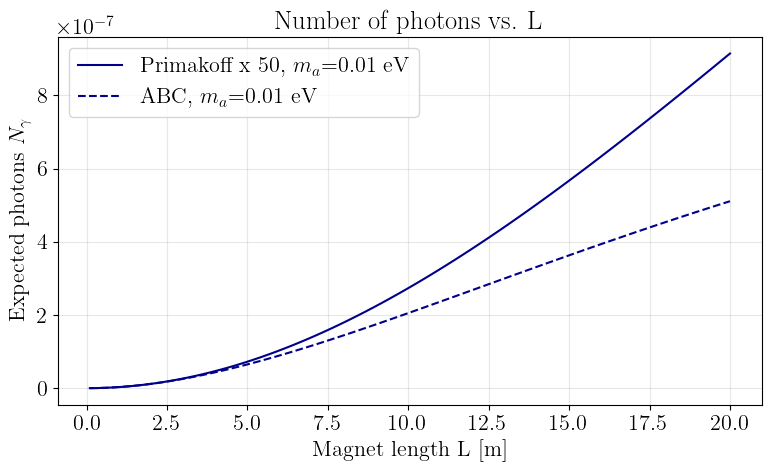

In [16]:
# Range of magnet lengths (m) to scan
L_values = np.linspace(0.1, 20.0, 80)   # meters

ma = 1e-2 # eV
g_agamma = 1e-12
g_ae = 1e-13

# Flux
E_array = np.linspace(0.001, 20, 200000) #keV
P_flux_array = primakoff_flux(E_array, g_agamma)*cm_to_m**2/s_to_year  # [cm^-2 s^-1 keV^-1]
ABC_flux_array = ABC_flux(E_array,  g_ae)*cm_to_m**2/s_to_year  # [cm^-2 s^-1 keV^-1]

ngamma_prim = np.zeros_like(L_values)
ngamma_abc = np.zeros_like(L_values)
# Loop over L and masses, integrate N_gamma
for i, Lm in enumerate(L_values):
    # Primakoff
    ngamma_prim[i] = number_photons(B_default, Lm , A_default, t_default, g_agamma, ma, P_flux_array, E_array, 0.0)
    # ABC
    ngamma_abc[i] = number_photons(B_default, Lm , A_default, t_default, g_agamma, ma, ABC_flux_array, E_array, 0.0)

# ---- Plot results ----
plt.figure(figsize=(8,5))
plt.plot(L_values, ngamma_prim*50, color="darkblue",label="Primakoff x 50, $m_a$=0.01 eV")
plt.plot(L_values, ngamma_abc, '--', color="darkblue",label="ABC, $m_a$=0.01 eV")
plt.xlabel("Magnet length L [m]")
plt.ylabel(r"Expected photons $N_\gamma$")
#plt.yscale('log')
plt.legend()
plt.title("Number of photons vs. L")
plt.savefig("number_photons_vs_L.pdf")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

We see that the **interplay between theory and design** is central:  
- If the target model predicts only photon couplings → focus on maximising $B L$.  
- If electron couplings dominate → solar flux shape differs, and a longer magnet might not be optimal for larger axion masses because coherence is lost for smaller axion masses.   
- Increasing the aperture area is always advantageous but requires better optics to reduce the background
(see Sreemanti's lectures!)